## Data Exploration and Preprocessing

In [55]:
## Import the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import warnings



# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv(r'C:\Users\ambig\jupiter_notebook\Cognifyz intern_Projects\data\Hotel_Dataset.csv')
df.head(2)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ambig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ambig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [56]:
# Checking the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 9551
Number of columns: 21


In [57]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_rows) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_data)


                      Missing Values  Missing Percentage
Restaurant ID                      0            0.000000
Restaurant Name                    0            0.000000
Country Code                       0            0.000000
City                               0            0.000000
Address                            0            0.000000
Locality                           0            0.000000
Locality Verbose                   0            0.000000
Longitude                          0            0.000000
Latitude                           0            0.000000
Cuisines                           9            0.094231
Average Cost for two               0            0.000000
Currency                           0            0.000000
Has Table booking                  0            0.000000
Has Online delivery                0            0.000000
Is delivering now                  0            0.000000
Switch to order menu               0            0.000000
Price range                    

In [58]:

# drop rows with missing values (if necessary):
df = df.dropna()


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [60]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [61]:
## Check the dataset ntypes are

df.columns = df.columns.str.lower() # Convert column names to lower case

df.columns = df.columns.str.replace(' ', '_') # Replace spaces with underscores

df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '') # Remove special characters

In [62]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [63]:
def find_unique(df, col):
    if df[col].dtype == 'object':
        print("The Ntypes values in the column")
        print(df[col].unique())
        print(df[col].value_counts())
        print('----------------------------------------------------------------')

In [64]:
df[(df['city'] == 'Bras�_lia') | 
   (df['city'] == 'S��o Paulo') | 
   (df['city'] == '��stanbul')].head()


,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,currency,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
22,6600681,Chez Michou,30,Bras�_lia,"SCLN, 208, Bloco A, Loja 30, Asa Norte, Bras�_lia",Asa Norte,"Asa Norte, Bras�_lia",-47.881789,-15.764142,"Fast Food, French",...,Brazilian Real(R$),No,No,No,No,2,3.0,Orange,Average,6
23,6601005,Caf�� Daniel Briand,30,Bras�_lia,"SCLN 104, Bloco A, Loja 26, Asa Norte, Bras�_lia",Asa Norte,"Asa Norte, Bras�_lia",-47.882667,-15.777500,Cafe,...,Brazilian Real(R$),No,No,No,No,1,3.8,Yellow,Good,9
24,6600292,Casa do Biscoito Mineiro,30,Bras�_lia,"SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...",Asa Norte,"Asa Norte, Bras�_lia",-47.882136,-15.757472,Bakery,...,Brazilian Real(R$),No,No,No,No,2,3.7,Yellow,Good,11
25,6600441,Maori,30,Bras�_lia,"CLN 110, Bloco D, Loja 28, Asa Norte, Bras�_lia",Asa Norte,"Asa Norte, Bras�_lia",-47.888167,-15.758833,Brazilian,...,Brazilian Real(R$),No,No,No,No,3,3.8,Yellow,Good,11
26,6600970,Pizza �� Bessa,30,Bras�_lia,"SCS 214, Bloco C, Loja 40, Asa Sul, Bras�_lia",Asa Sul,"Asa Sul, Bras�_lia",-47.915667,-15.831167,Pizza,...,Brazilian Real(R$),No,No,No,No,2,3.2,Orange,Average,11


In [65]:
# Replace incorrect or malformed city names in the 'city' column of the DataFrame with their correct spellings
df['city'] = df['city'].replace(
    {'Bras�_lia': 'Brasília',       # Correcting 'Bras�_lia' to 'Brasília'
     'S��o Paulo': 'São Paulo',    # Correcting 'S��o Paulo' to 'São Paulo'
     '��stanbul': 'Istanbul'       # Correcting '��stanbul' to 'Istanbul'
     }
)


In [66]:
# Print the number of restaurants with average cost for two >= 700
print(f'Number of restaurants with average cost for two >= 700: {df[df["average_cost_for_two"] >= 1000].shape}')

print(f'The shape of the df is {df.shape}')

# Remove rows where average_cost_for_two is greater than the 95th percentile
df = df[df["average_cost_for_two"] <= df["average_cost_for_two"].quantile(0.95)]

print(f'The shape of the df is {df.shape}')


Number of restaurants with average cost for two >= 700: (1456, 21)
The shape of the df is (9542, 21)
The shape of the df is (9082, 21)


In [67]:
find_unique(df=df,col='cuisines')

The Ntypes values in the column
['French, Japanese, Desserts' 'Japanese' 'Japanese, Sushi' ...
 'Burger, Izgara' 'World Cuisine, Patisserie, Cafe'
 'Italian, World Cuisine']
cuisines
North Indian                                           921
North Indian, Chinese                                  504
Fast Food                                              354
Chinese                                                337
North Indian, Mughlai                                  318
                                                      ... 
Grill, Steak, Burger, Sushi, Tapas                       1
Italian, Pizza, Beverages, Desserts, Grill, Seafood      1
Contemporary, Burger, European                           1
Contemporary, Italian                                    1
Grill, Burger                                            1
Name: count, Length: 1658, dtype: int64
----------------------------------------------------------------


In [68]:
df.select_dtypes(include='object').columns

Index(['restaurant_name', 'city', 'address', 'locality', 'locality_verbose',
       'cuisines', 'currency', 'has_table_booking', 'has_online_delivery',
       'is_delivering_now', 'switch_to_order_menu', 'rating_color',
       'rating_text'],
      dtype='object')

### Distribution of the Target Variable ("Aggregate Rating")

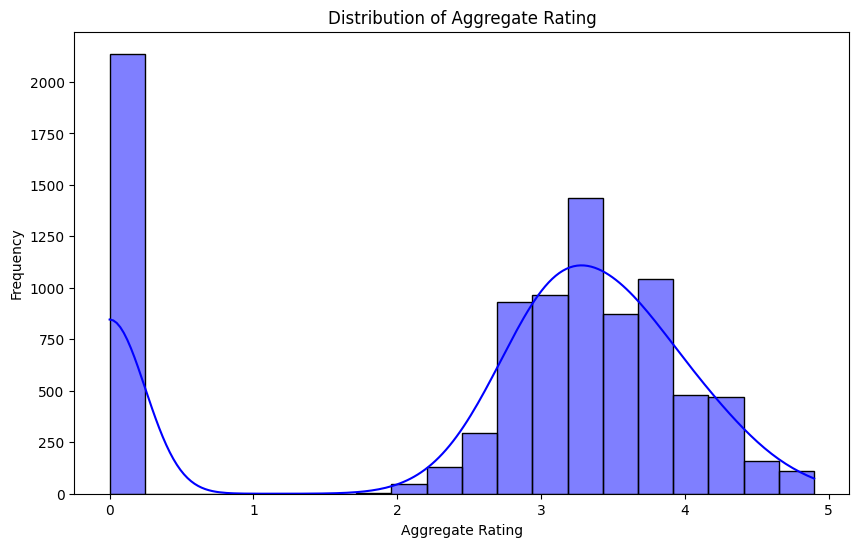

In [69]:
# Plotting the distribution of the 'Aggregate rating' column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()




- Most items have low aggregate ratings 
- Fewer items have moderate to high ratings
- A small number of items have the highest ratings



### Identifying Class Imbalances in "Aggregate Rating":

In [70]:
# Creating categories for ratings (Low, Medium, High)
rating_bins = [0, 2, 3.5, 5]
rating_labels = ['Low', 'Medium', 'High']
df['Rating Category'] = pd.cut(df['aggregate_rating'], bins=rating_bins, labels=rating_labels, right=False)

# Checking the distribution of the new categorical target variable
rating_distribution = df['Rating Category'].value_counts()
print(rating_distribution)


Rating Category
Medium    3802
High      3140
Low       2140
Name: count, dtype: int64


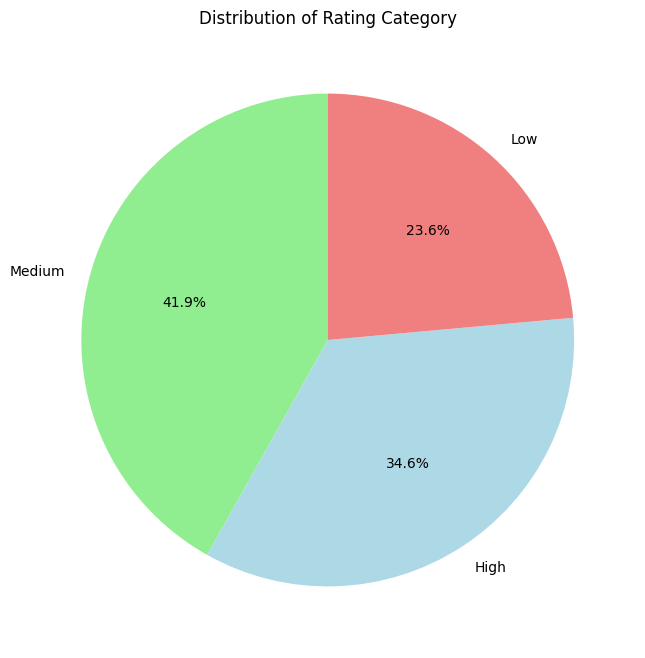

In [71]:
# Plotting a pie chart for the Rating Category distribution
plt.figure(figsize=(8, 8))
rating_distribution.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Rating Category')
plt.ylabel('')  # Hides the y-axis label
plt.show()


The distribution indicates that most items receive a "Medium" or "High" rating, with a smaller portion receiving a "Low" rating. This suggests the overall quality and performance of the items is skewed more towards the higher end of the rating spectrum.

### Descriptive Analysis


In [72]:
df.describe()

,restaurant_id,country_code,longitude,latitude,average_cost_for_two,price_range,aggregate_rating,votes
count,9.082000e+03,9082.000000,9082.000000,9082.000000,9082.000000,9082.000000,9082.000000,9082.000000
mean,9.253321e+06,18.393416,63.602564,25.889488,485.080599,1.707113,2.615151,140.355649
std,8.796936e+06,57.053517,42.004807,11.091456,353.176195,0.807882,1.527941,389.766211
min,5.500000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.026618e+05,1.000000,77.080173,28.479909,250.000000,1.000000,2.400000,4.000000
50%,6.600826e+06,1.000000,77.190614,28.571482,400.000000,2.000000,3.200000,27.000000
75%,1.835644e+07,1.000000,77.283005,28.644585,600.000000,2.000000,3.600000,116.000000
max,1.850065e+07,216.000000,174.832089,55.976980,1700.000000,4.000000,4.900000,9667.000000


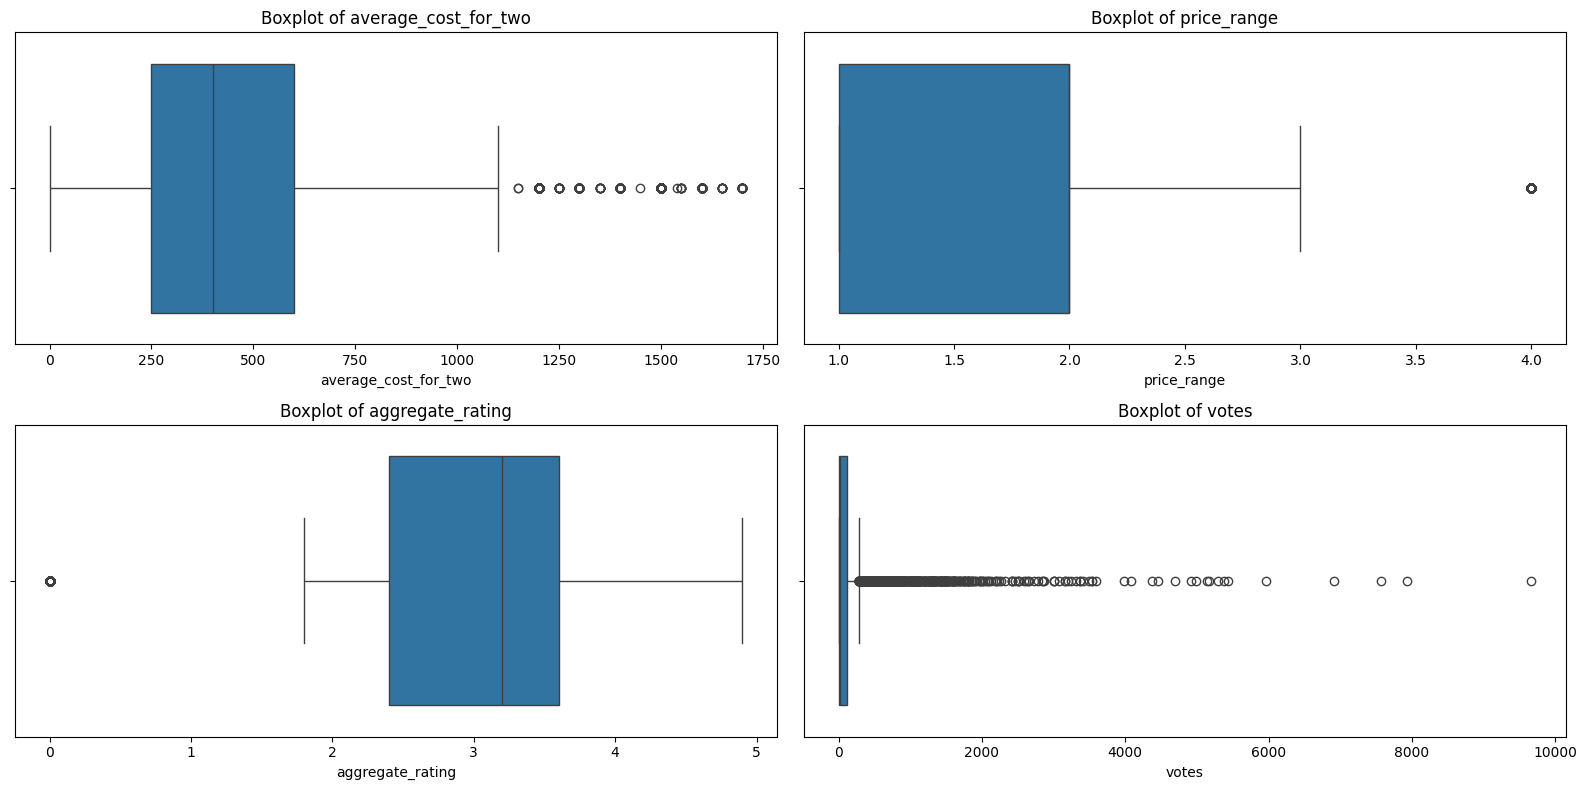

In [73]:

# Define numerical columns
numerical_columns = ['average_cost_for_two', 
                     'price_range', 'aggregate_rating', 'votes']

# Create a figure and set of subplots (adjust the number of rows/columns as needed)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))  # 2 rows, 4 columns

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot a boxplot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

The boxplot of votes indicates a long-tailed distribution, with a majority of items **'average_cost_for_twounder'** 2000 votes, but some outliers receiving over 8000.

In [74]:
# Print the number of restaurants with average cost for two >= 700
print(f'Number of restaurants with average cost for two >= 700: {df[df["average_cost_for_two"] >= 1000].shape}')

print(f'The shape of the df is {df.shape}')

# Remove rows where average_cost_for_two is greater than the 95th percentile
df = df[df["average_cost_for_two"] <= df["average_cost_for_two"].quantile(0.95)]

print(f'The shape of the df is {df.shape}')



Number of restaurants with average cost for two >= 700: (996, 22)
The shape of the df is (9082, 22)
The shape of the df is (8681, 22)


In [75]:
# Replace NaN values with an empty list
df['cuisines'] = df['cuisines'].fillna('')

# Splitting the 'cuisines' column into a list of cuisines
df['cuisines'] = df['cuisines'].str.split(', ')

# Creating four new columns for the cuisines
df['cuisine1'] = df['cuisines'].apply(lambda x: x[0] if len(x) > 0 else None)
df['cuisine2'] = df['cuisines'].apply(lambda x: x[1] if len(x) > 1 else None)
df['cuisine3'] = df['cuisines'].apply(lambda x: x[2] if len(x) > 2 else None)
df['cuisine4'] = df['cuisines'].apply(lambda x: x[3] if len(x) > 3 else None)

# Dropping the original 'cuisines' column
df = df.drop(columns=['cuisines'])

df.head(2)



,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,average_cost_for_two,...,price_range,aggregate_rating,rating_color,rating_text,votes,Rating Category,cuisine1,cuisine2,cuisine3,cuisine4
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,1100,...,3,4.8,Dark Green,Excellent,314,High,French,Japanese,Desserts,None
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,1200,...,3,4.5,Dark Green,Excellent,591,High,Japanese,None,None,None


In [76]:
# Count the occurrences of each cuisine
cuisine_counts = df[['cuisine1', 'cuisine2', 'cuisine3', 'cuisine4']].apply(pd.Series.value_counts).fillna(0).astype(int)

# Calculate the total number of occurrences for each cuisine
cuisine_counts['Total'] = cuisine_counts.sum(axis=1)

# Sort the cuisines by total occurrences
cuisine_counts = cuisine_counts.sort_values(by='Total', ascending=False)

print("Cuisine Counts:")
print(cuisine_counts)

# Basic statistics for each cuisine column
print("\nBasic Statistics:")
print(df.describe())

# Calculate the mean count of cuisines
mean_count = cuisine_counts.mean()

Cuisine Counts:
              cuisine1  cuisine2  cuisine3  cuisine4  Total
North Indian      2716       615       132        35   3498
Chinese            786      1044       529        59   2418
Fast Food          671       816       382        72   1941
Mughlai            204       579       107        12    902
Bakery             620        62        27        15    724
...                ...       ...       ...       ...    ...
Mineira              0         1         0         0      1
Peruvian             1         0         0         0      1
Ramen                1         0         0         0      1
Soul Food            0         0         1         0      1
Western              1         0         0         0      1

[140 rows x 5 columns]

Basic Statistics:
       restaurant_id  country_code    longitude     latitude  \
count   8.681000e+03   8681.000000  8681.000000  8681.000000   
mean    9.376878e+06     19.097685    63.049974    25.905143   
std     8.796981e+06     58.1

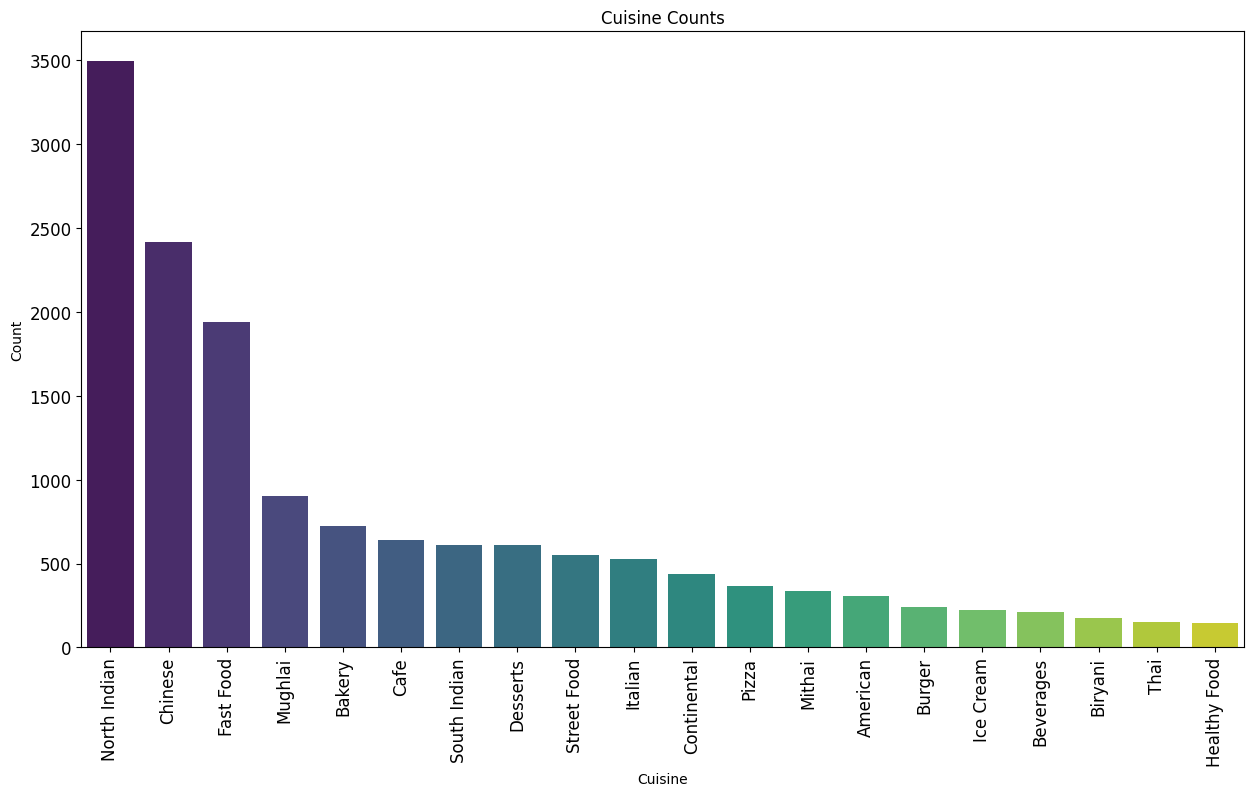

In [77]:
# Combine all cuisine columns into a single series for analysis
all_cuisines = pd.concat([df['cuisine1'], df['cuisine2'], df['cuisine3'], df['cuisine4']]).dropna()

# Count the occurrences of each cuisine
cuisine_counts = all_cuisines.value_counts()[:20]

# Plotting the cuisine counts
plt.figure(figsize=(15, 8))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')
plt.title('Cuisine Counts')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()





- *North Indian* cuisine has the highest number of listings in the hotel data.
- From this data, we can clearly say that North Indian cuisine is the most common in the dataset of hotels

In [78]:
# Replace NaN values with an empty list
df['address'] = df['address'].fillna('')

# Splitting the 'address' column into a list of address
df['address'] = df['address'].str.split(', ')

# Creating four new columns for the cuisines
df['floor'] = df['address'].apply(lambda x: x[0] if len(x) > 0 else None)
df['mall_name'] = df['address'].apply(lambda x: x[1] if len(x) > 1 else None)
df['street_name'] = df['address'].apply(lambda x: x[2] if len(x) > 2 else None)
df['city'] = df['address'].apply(lambda x: x[3] if len(x) > 3 else None)

# Dropping the original 'cuisines' column
df = df.drop(columns=['address','locality','locality_verbose'])

df.head()



,restaurant_id,restaurant_name,country_code,city,longitude,latitude,average_cost_for_two,currency,has_table_booking,has_online_delivery,...,rating_text,votes,Rating Category,cuisine1,cuisine2,cuisine3,cuisine4,floor,mall_name,street_name
0,6317637,Le Petit Souffle,162,Poblacion,121.027535,14.565443,1100,Botswana Pula(P),Yes,No,...,Excellent,314,High,French,Japanese,Desserts,None,Third Floor,Century City Mall,Kalayaan Avenue
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,1200,Botswana Pula(P),Yes,No,...,Excellent,591,High,Japanese,None,None,None,Little Tokyo,2277 Chino Roces Avenue,Legaspi Village
5,18189371,Din Tai Fung,162,Ortigas,121.056314,14.583764,1000,Botswana Pula(P),No,No,...,Very Good,336,High,Chinese,None,None,None,Ground Floor,Mega Fashion Hall,SM Megamall
9,6314987,Locavore,162,Pasig City,121.056532,14.572041,1100,Botswana Pula(P),Yes,No,...,Excellent,532,High,Filipino,None,None,None,Brixton Technology Center,10 Brixton Street,Kapitolyo
10,6309903,Silantro Fil-Mex,162,None,121.057916,14.567689,800,Botswana Pula(P),No,No,...,Excellent,1070,High,Filipino,Mexican,None,None,75 East Capitol Drive,Kapitolyo,Pasig City


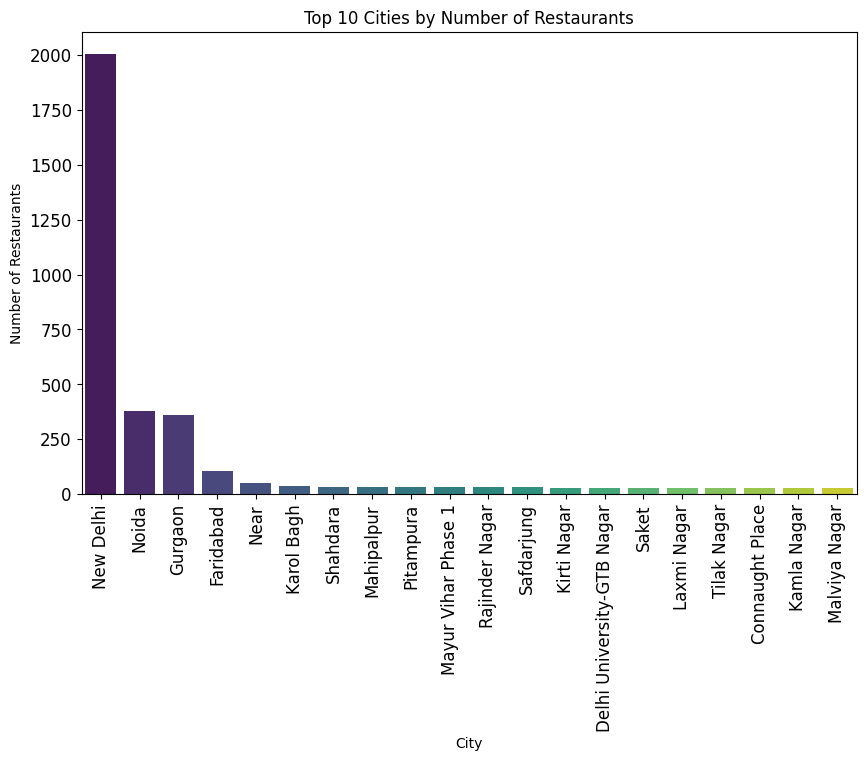

In [79]:
# Count the occurrences of each city
city_counts = df['city'].value_counts()[:20]

# Plotting the city counts
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()




- From that above mentioned the more number of hotel data are collected in *North India*

### Geospatial Analysis

In [80]:
df.head(1)

,restaurant_id,restaurant_name,country_code,city,longitude,latitude,average_cost_for_two,currency,has_table_booking,has_online_delivery,...,rating_text,votes,Rating Category,cuisine1,cuisine2,cuisine3,cuisine4,floor,mall_name,street_name
0,6317637,Le Petit Souffle,162,Poblacion,121.027535,14.565443,1100,Botswana Pula(P),Yes,No,...,Excellent,314,High,French,Japanese,Desserts,None,Third Floor,Century City Mall,Kalayaan Avenue


In [81]:
''' import folium
from folium.plugins import MarkerCluster

# Create a map centered around the average latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Create a MarkerCluster to group nearby markers
marker_cluster = MarkerCluster().add_to(restaurant_map)

# Add markers for each restaurant with custom icon colors based on ratings
for idx, row in df.iterrows():
    rating = row['aggregate_rating']
    
    # Change marker color based on rating
    if rating >= 4:
        color = 'green'
    elif rating >= 3:
        color = 'orange'
    else:
        color = 'red'
    
    # Create a marker with a custom color
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['restaurant_name']} (Rating: {rating})",
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(marker_cluster)

# Save the map to an HTML file
restaurant_map.save('restaurant_map.html')
'''



' import folium\nfrom folium.plugins import MarkerCluster\n\n# Create a map centered around the average latitude and longitude\nmap_center = [df[\'latitude\'].mean(), df[\'longitude\'].mean()]\nrestaurant_map = folium.Map(location=map_center, zoom_start=12)\n\n# Create a MarkerCluster to group nearby markers\nmarker_cluster = MarkerCluster().add_to(restaurant_map)\n\n# Add markers for each restaurant with custom icon colors based on ratings\nfor idx, row in df.iterrows():\n    rating = row[\'aggregate_rating\']\n    \n    # Change marker color based on rating\n    if rating >= 4:\n        color = \'green\'\n    elif rating >= 3:\n        color = \'orange\'\n    else:\n        color = \'red\'\n    \n    # Create a marker with a custom color\n    folium.Marker(\n        location=[row[\'latitude\'], row[\'longitude\']],\n        popup=f"{row[\'restaurant_name\']} (Rating: {rating})",\n        icon=folium.Icon(color=color, icon=\'info-sign\')\n    ).add_to(marker_cluster)\n\n# Save the map

In [82]:


# Analyze distribution of restaurants by city and country
city_counts = df.groupby('city')['restaurant_name'].count().sort_values(ascending=False)
country_counts = df.groupby('country_code')['restaurant_name'].count().sort_values(ascending=False)


print(f"Top 3 cities by restaurant count: {city_counts.head(3)}")
print('--------------------------------')
print(f"Top 3 countries by restaurant count: {country_counts.head(3)}")
print('--------------------------------')
print(f"Percentage of restaurants in top 3 cities: {city_counts.head(3).sum() / df.shape[0] * 100:.2f}%")


Top 3 cities by restaurant count: city
New Delhi    2005
Noida         380
Gurgaon       361
Name: restaurant_name, dtype: int64
--------------------------------
Top 3 countries by restaurant count: country_code
1      7839
216     425
215      80
Name: restaurant_name, dtype: int64
--------------------------------
Percentage of restaurants in top 3 cities: 31.63%


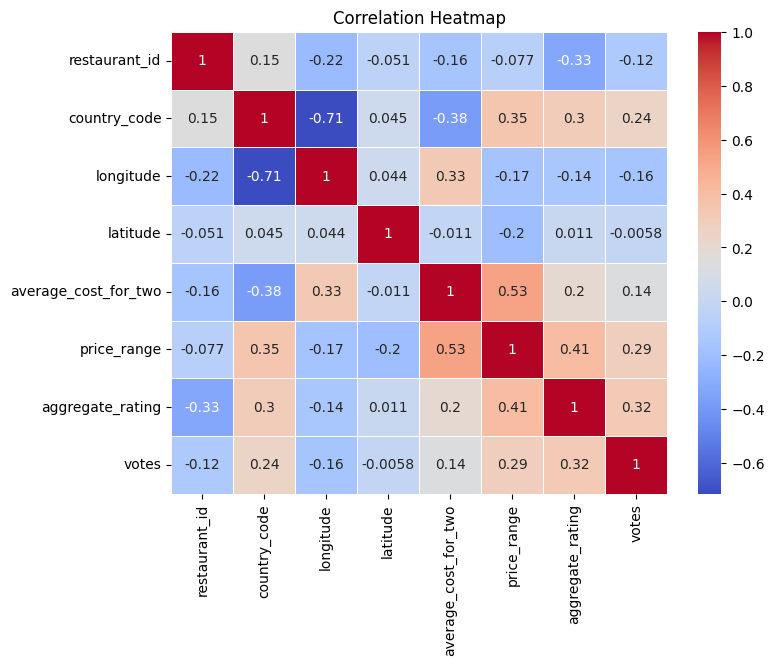

In [83]:
## Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Key insights from the correlation heatmap:



- Moderate *negative correlation* between *country_code* and *price_range* (-0.71). Restaurants in some countries may have **lower price ranges.**

- *Weak positive correlation* between *latitude/longitude* and *aggregate_rating* (0.0072 and -0.13). Location may have **little influence** on rating.

- *Moderate positive correlation* between *average_cost_for_two* and *price_range* (0.61). Higher cost restaurants tend to have **higher price ranges.**

- *Moderate positive correlation* between *price_range* and *aggregate_rating* (0.43). Higher priced restaurants may **receive better ratings.**

- *Weak positive correlation* between *votes* and *aggregate_rating* (0.31). More votes do not necessarily indicate **higher ratings.**



In [84]:
df.head()

,restaurant_id,restaurant_name,country_code,city,longitude,latitude,average_cost_for_two,currency,has_table_booking,has_online_delivery,...,rating_text,votes,Rating Category,cuisine1,cuisine2,cuisine3,cuisine4,floor,mall_name,street_name
0,6317637,Le Petit Souffle,162,Poblacion,121.027535,14.565443,1100,Botswana Pula(P),Yes,No,...,Excellent,314,High,French,Japanese,Desserts,None,Third Floor,Century City Mall,Kalayaan Avenue
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,1200,Botswana Pula(P),Yes,No,...,Excellent,591,High,Japanese,None,None,None,Little Tokyo,2277 Chino Roces Avenue,Legaspi Village
5,18189371,Din Tai Fung,162,Ortigas,121.056314,14.583764,1000,Botswana Pula(P),No,No,...,Very Good,336,High,Chinese,None,None,None,Ground Floor,Mega Fashion Hall,SM Megamall
9,6314987,Locavore,162,Pasig City,121.056532,14.572041,1100,Botswana Pula(P),Yes,No,...,Excellent,532,High,Filipino,None,None,None,Brixton Technology Center,10 Brixton Street,Kapitolyo
10,6309903,Silantro Fil-Mex,162,None,121.057916,14.567689,800,Botswana Pula(P),No,No,...,Excellent,1070,High,Filipino,Mexican,None,None,75 East Capitol Drive,Kapitolyo,Pasig City


# Level 2  
### Table Booking and Online Delivery

In [85]:
## Table Booking availability percentage havin Yes for 1 No for 0
table_booking_counts = df['has_table_booking'].value_counts()
table_booking_percentage = table_booking_counts / df.shape[0] * 100

print("Table Booking Availability Percentage:")
print(table_booking_percentage)


Table Booking Availability Percentage:
has_table_booking
No     93.295703
Yes     6.704297
Name: count, dtype: float64


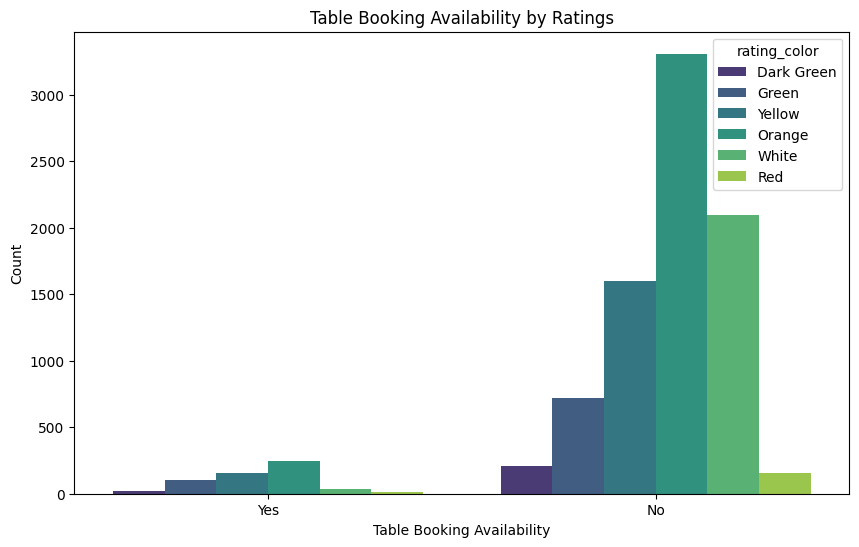

In [86]:
## Create a plot for Table booking with hue as ratings
plt.figure(figsize=(10,6))
sns.countplot(x='has_table_booking', hue='rating_color', data=df, palette='viridis')
plt.title('Table Booking Availability by Ratings')
plt.xlabel('Table Booking Availability')
plt.ylabel('Count')
plt.show()

This Graph shows that 'Table Booking Availability' is does not affect the performance of the ratings

Average rating for restaurants with table booking: 3.3
Average rating for restaurants without table booking: 2.5


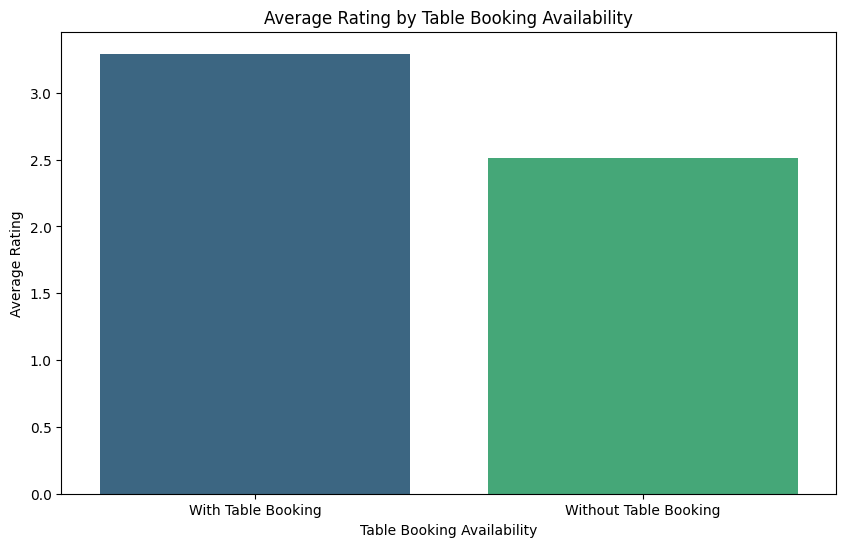

In [87]:
# Convert 'Yes'/'No' to 1/0 for table booking column
df1 = df
df1['has_table_booking'] = df['has_table_booking'].map({'Yes': 1, 'No': 0})

# Filter only numeric ratings for calculation
df1['aggregate_rating'] = pd.to_numeric(df1['aggregate_rating'], errors='coerce')

# Calculate average rating for restaurants with table booking
with_booking = df1[df1['has_table_booking'] == 1]['aggregate_rating'].mean()

# Calculate average rating for restaurants without table booking
without_booking = df1[df1['has_table_booking'] == 0]['aggregate_rating'].mean()

# Print the results
print(f"Average rating for restaurants with table booking: {with_booking:.1f}")
print(f"Average rating for restaurants without table booking: {without_booking:.1f}")

## Plot the results

plt.figure(figsize=(10,6))
sns.barplot(x=['With Table Booking', 'Without Table Booking'], y=[with_booking, without_booking], palette='viridis')
plt.title('Average Rating by Table Booking Availability')
plt.xlabel('Table Booking Availability')
plt.ylabel('Average Rating')
plt.show()


This suggests that establishments offering table booking tend to have higher average ratings compared to those that do not. This information is relevant for businesses in the Hotel  as it highlights the *potential impact of offering table booking* on customer satisfaction and ratings.

Rating Category Counts:
rating_text      Average  Excellent  Good  Not rated  Poor  Very Good
Rating Category                                                      
Low                    0          0     0       2130     3          0
Medium              3555          0     0          0   171          0
High                   0        236  1761          0     0        825


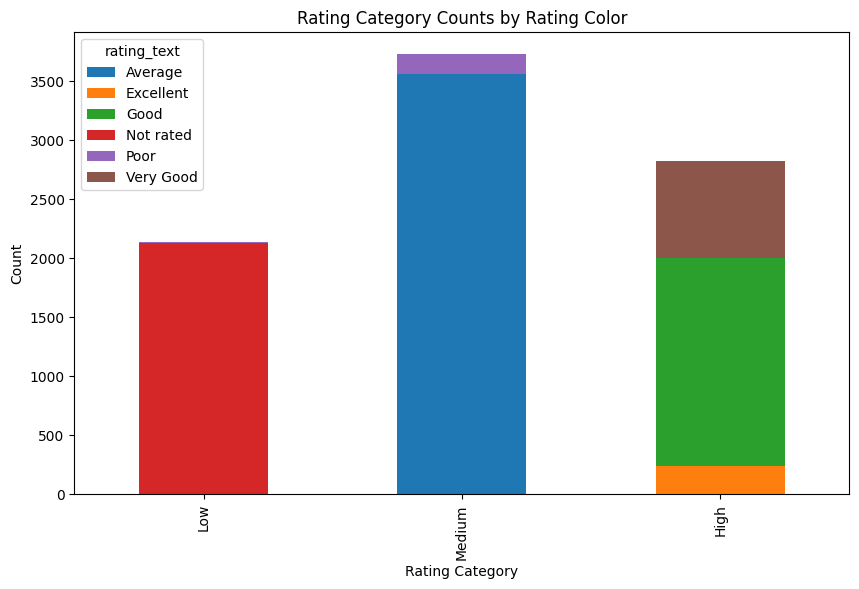

In [88]:
rating_category_counts = df.groupby('Rating Category')['rating_text'].value_counts()

print("Rating Category Counts:")

# Sort the counts by rating category and rating color
rating_category_counts = rating_category_counts.sort_index()

# Create a DataFrame from the counts

rating_category_counts_df = rating_category_counts.to_frame().reset_index()
rating_category_counts_df.columns = ['Rating Category', 'rating_text', 'Count']

# Pivot the DataFrame to have rating color as columns
rating_category_counts_df = rating_category_counts_df.pivot(index='Rating Category', columns='rating_text', values='Count')
print(rating_category_counts_df)

#plot the bar graphs using the rating category count as columns and the rating color as columns 

rating_category_counts_df.plot(kind='bar', figsize=(10,6), stacked=True)
plt.title('Rating Category Counts by Rating Color')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()


- **Low** level rating category has no ratings.
- **Medium** level rating category has mostly average ratings with some poor ratings.
- **High** level rating category has mostly above-average ratings, such as good, very good, and excellent.


Percentage of 3-priced restaurants with online delivery: 26.7%
Percentage of 2-priced restaurants with online delivery: 41.4%
Percentage of 1-priced restaurants with online delivery: 15.8%
Percentage of 4-priced restaurants with online delivery: 5.0%


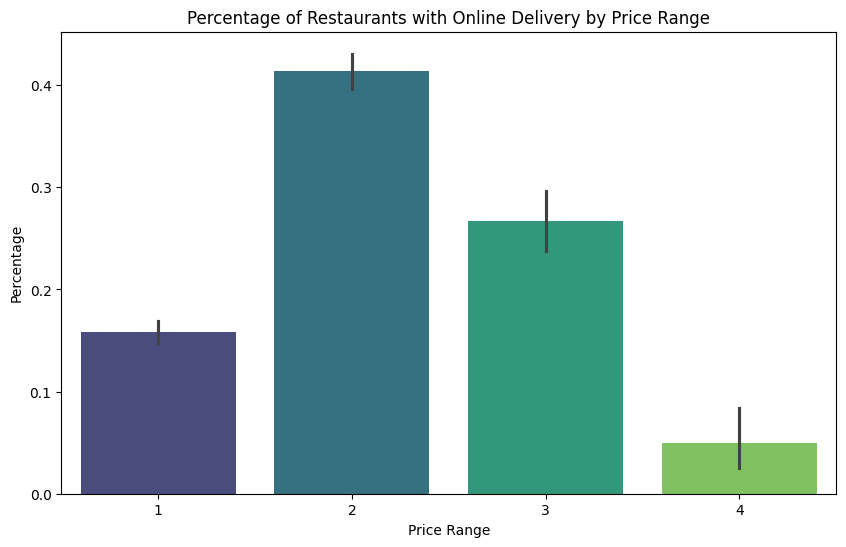

In [89]:
# Convert 'Yes' to 1 and 'No' to 0 in the 'has_online_delivery' column
df1['has_online_delivery'] = df1['has_online_delivery'].map({'Yes': 1, 'No': 0})

# Now calculate the percentage for each price range
for price_range in df1['price_range'].unique():
    delivery_pct = df1.loc[df1['price_range'] == price_range, 'has_online_delivery'].mean() * 100
    print(f"Percentage of {price_range}-priced restaurants with online delivery: {delivery_pct:.1f}%")
    
## Plot the results
plt.figure(figsize=(10,6))
# Create a bar plot with price range on x-axis and delivery percentage on y-axis
sns.barplot(x='price_range', y='has_online_delivery', data=df1, palette='viridis')
plt.title('Percentage of Restaurants with Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.show()


The analysis shows that a greater number of restaurants offering online delivery fall within *price ranges 2 and 3*, indicating that mid-range priced restaurants cater more to online delivery demands compared to other price categories.

##  Price Range Analysis

The most common price range is: 1
Percentage of 1-priced restaurants with online delivery: 15.8%


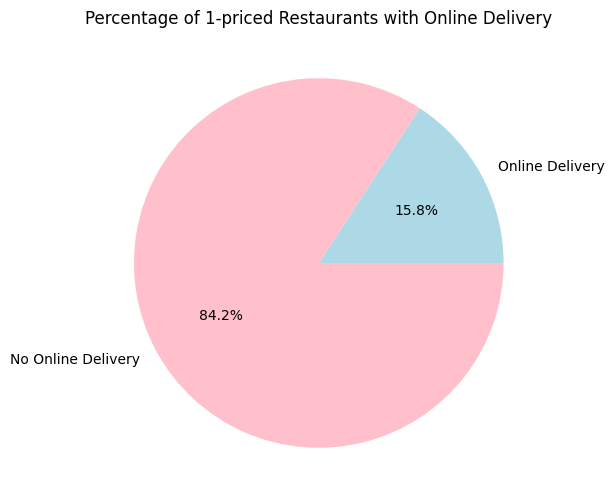

In [90]:
## Determine the most common price range 
most_common_price_range = df1['price_range'].mode()[0]
print(f"The most common price range is: {most_common_price_range}")

## Calculate the percentage of restaurants with online delivery for the most common price range
online_delivery_percentage = (df1.loc[df1['price_range'] == most_common_price_range,'has_online_delivery'].mean() * 100)

print(f"Percentage of {most_common_price_range}-priced restaurants with online delivery: {online_delivery_percentage:.1f}%")

## Plot the results

plt.figure(figsize=(10,6))

# Create a pie chart with price range as labels and delivery percentage as the size

plt.pie([online_delivery_percentage, 100 - online_delivery_percentage], labels=['Online Delivery', 'No Online Delivery'],
        autopct='%1.1f%%', colors=['lightblue', 'pink'])

plt.title(f'Percentage of {most_common_price_range}-priced Restaurants with Online Delivery')
plt.show()


Average rating for each price range:
price_range
1    1.997476
2    2.940804
3    3.651235
4    4.136634
Name: aggregate_rating, dtype: float64


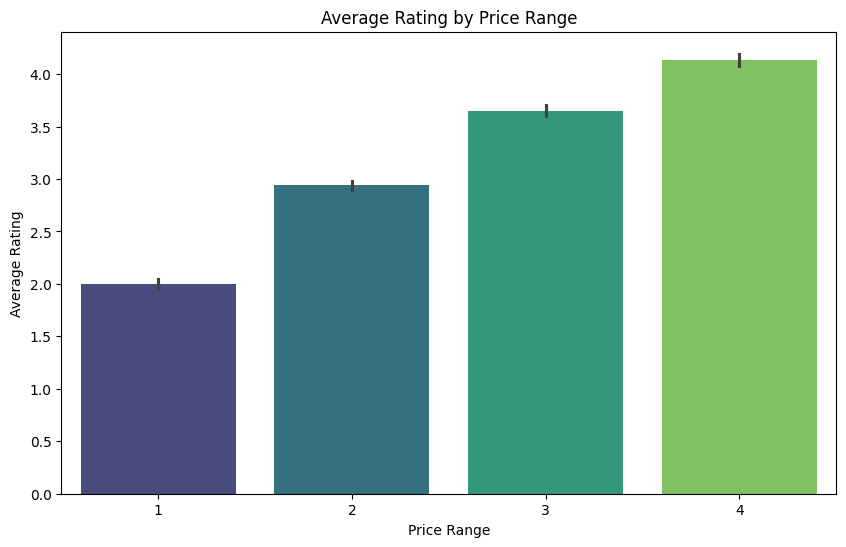

In [91]:
## Calculate the average rating for each price range
average_rating_by_price_range = df1.groupby('price_range')['aggregate_rating'].mean()
print("\nAverage rating for each price range:")
print(average_rating_by_price_range)

## Plot the results
plt.figure(figsize=(10,6))
# Create a bar plot with price range on x-axis and average rating on y-axis
sns.barplot(x='price_range', y='aggregate_rating', data=df1, palette='viridis')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()


Color representing the highest rating amoung the price range:
   price_range rating_color
0            1       Yellow
1            2       Yellow
2            3       Yellow
3            4       Yellow


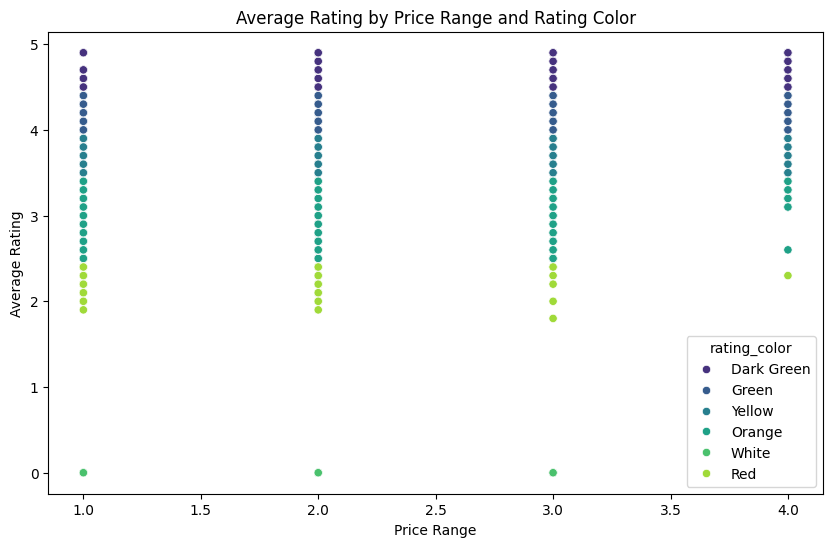

In [92]:
#  Identify the color representing the highest rating amoung the price range
#  of the product. The color is represented by a string in the format of '#RRG

highest_rating_color = df1.groupby('price_range')['rating_color'].max().reset_index()
print("\nColor representing the highest rating amoung the price range:")
print(highest_rating_color)

# Create a scatter plot with price range on x-axis and average rating on y-axis

plt.figure(figsize=(10,6))
sns.scatterplot(x='price_range', y='aggregate_rating', hue='rating_color', data=df1, palette='viridis')
plt.title('Average Rating by Price Range and Rating Color')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')

plt.show()


In [99]:
## find country code with  city


The country code for the city 'Makati City' is: 162


## Feature Engineering

In [39]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'longitude',
       'latitude', 'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'Rating Category', 'cuisine1', 'cuisine2', 'cuisine3',
       'cuisine4', 'floor', 'mall_name', 'street_name'],
      dtype='object')

In [40]:
# Mapping rating text to numerical scores (e.g., Excellent = 5, Very Good = 4)
rating_weights = {'Excellent': 5, 'Very Good': 4, 'Good': 3, 'Average': 2, 'Poor': 1}

# Popularity score is the number of votes multiplied by the rating score
df['popularity_score'] = df['votes'] * df['rating_text'].map(rating_weights)  # Formula: popularity_score = votes * rating_score


# Categorizing average cost into different price levels: Low, Medium, High, Very High
price_bins = [0, 500, 1000, 2000]  # Price ranges
price_labels = ['Low', 'Medium', 'High']  # Labels for price categories

# Assigning each restaurant to a price level based on average cost
df['price_level'] = pd.cut(df['average_cost_for_two'], bins=price_bins, labels=price_labels, include_lowest=True)  # Formula: cut(average_cost_for_two, price_bins)


# Counting the number of cuisines for each restaurant (non-null entries in cuisine columns)
df['cuisine_count'] = df[['cuisine1', 'cuisine2', 'cuisine3', 'cuisine4']].notna().sum(axis=1)  # Formula: count(non-null values in cuisine columns)


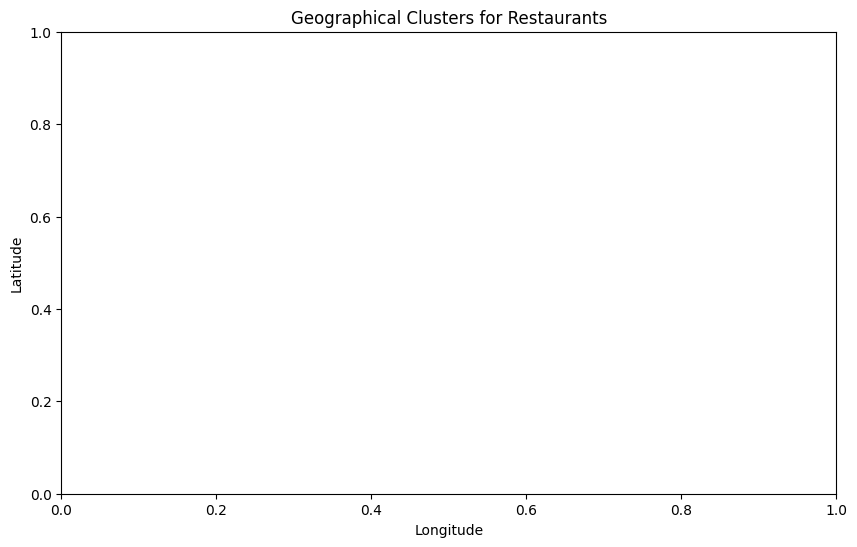

In [41]:

# Grouping restaurants into geographical clusters based on longitude and latitude

kmeans = KMeans(n_clusters=5, random_state=42)  # Clustering into 5 groups
df['geo_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])  # Formula: KMeans(longitude, latitude)

# City restaurant density (restaurants per city)
city_counts = df['city'].value_counts()  # Formula: count(restaurants per city)
df['city_restaurant_density'] = df['city'].map(city_counts)  # Formula: map(city_counts)

# Average rating per city
avg_city_rating = df.groupby('city')['aggregate_rating'].mean()  # Formula: mean(aggregate_rating by city)
df['average_city_rating'] = df['city'].map(avg_city_rating)  # Formula: map(avg_city_rating)

# Mall popularity (restaurants per mall)
mall_counts = df['mall_name'].value_counts()  # Formula: count(restaurants per mall)
df['mall_popularity'] = df['mall_name'].map(mall_counts)  # Formula: map(mall_counts)

# Floor rank based on the number of restaurants per floor (higher count means higher rank)
floor_rank = df['floor'].value_counts().rank(ascending=False)  # Formula: rank(floor by count)
df['floor_rank'] = df['floor'].map(floor_rank)  # Formula: map(floor_rank)


## Visualize the data cluster for each restaurant 
plt.figure(figsize=(10,6))
#plt.scatter(df['longitude'], df['latitude'], c=df['geo_cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Clusters for Restaurants')
plt.show() 


In [42]:
# Create a binary feature indicating if the restaurant has a high rating (Rating Category = High)
df['is_highly_rated'] = (df['Rating Category'] == 'High').astype(int)  # Formula: if Rating Category = 'High', then 1, else 0

# Calculating the popularity of each cuisine across all restaurants
cuisine_popularity = pd.concat([df['cuisine1'], df['cuisine2'], df['cuisine3'], df['cuisine4']]).value_counts()  # Formula: count(cuisines across all rows)
df['cuisine_popularity'] = df['cuisine1'].map(cuisine_popularity)  # Formula: map(cuisine_popularity to cuisine1)

def extract_floor(floor):
    # Map common floor names to numbers
    floor_mapping = {
        "Ground Floor": 0,
        "First Floor": 1,
        "Second Floor": 2,
        "Third Floor": 3,
        "Fourth Floor": 4
    }
    # Check if the floor matches the mapping
    if isinstance(floor, str):
        for key in floor_mapping:
            if key in floor:
                return floor_mapping[key]
    return 0

# Apply the function to the floor column
df["floor"] = df["floor"].apply(extract_floor)

# Floor rank based on the number of restaurants per floor (higher count means higher rank)
floor_rank = df['floor'].value_counts().rank(ascending=False)  # Formula: rank(floor by count)
df['floor_rank'] = df['floor'].map(floor_rank)

# Replace all occurrences of 'None' with 'Unknown' in the entire DataFrame only if datatype is object
#df['floor'] = df['floor'].astype(str).replace('None', 'Unknown', regex=True)
# Replace all occurrences of 'None' with 0 in the entire DataFrame only if datatype is object

#df['floor'] = df['floor'].astype(str).replace('None', 0, regex=True)

# Check if the replacement was successful
print(df.isin(['None']).sum())  # This will show how many 'None' values are left in the DataFrame






restaurant_id              0
restaurant_name            0
country_code               0
city                       0
longitude                  0
latitude                   0
average_cost_for_two       0
currency                   0
has_table_booking          0
has_online_delivery        0
is_delivering_now          0
switch_to_order_menu       0
price_range                0
aggregate_rating           0
rating_color               0
rating_text                0
votes                      0
Rating Category            0
cuisine1                   0
cuisine2                   0
cuisine3                   0
cuisine4                   0
floor                      0
mall_name                  0
street_name                0
popularity_score           0
price_level                0
cuisine_count              0
geo_cluster                0
city_restaurant_density    0
average_city_rating        0
mall_popularity            0
floor_rank                 0
is_highly_rated            0
cuisine_popula

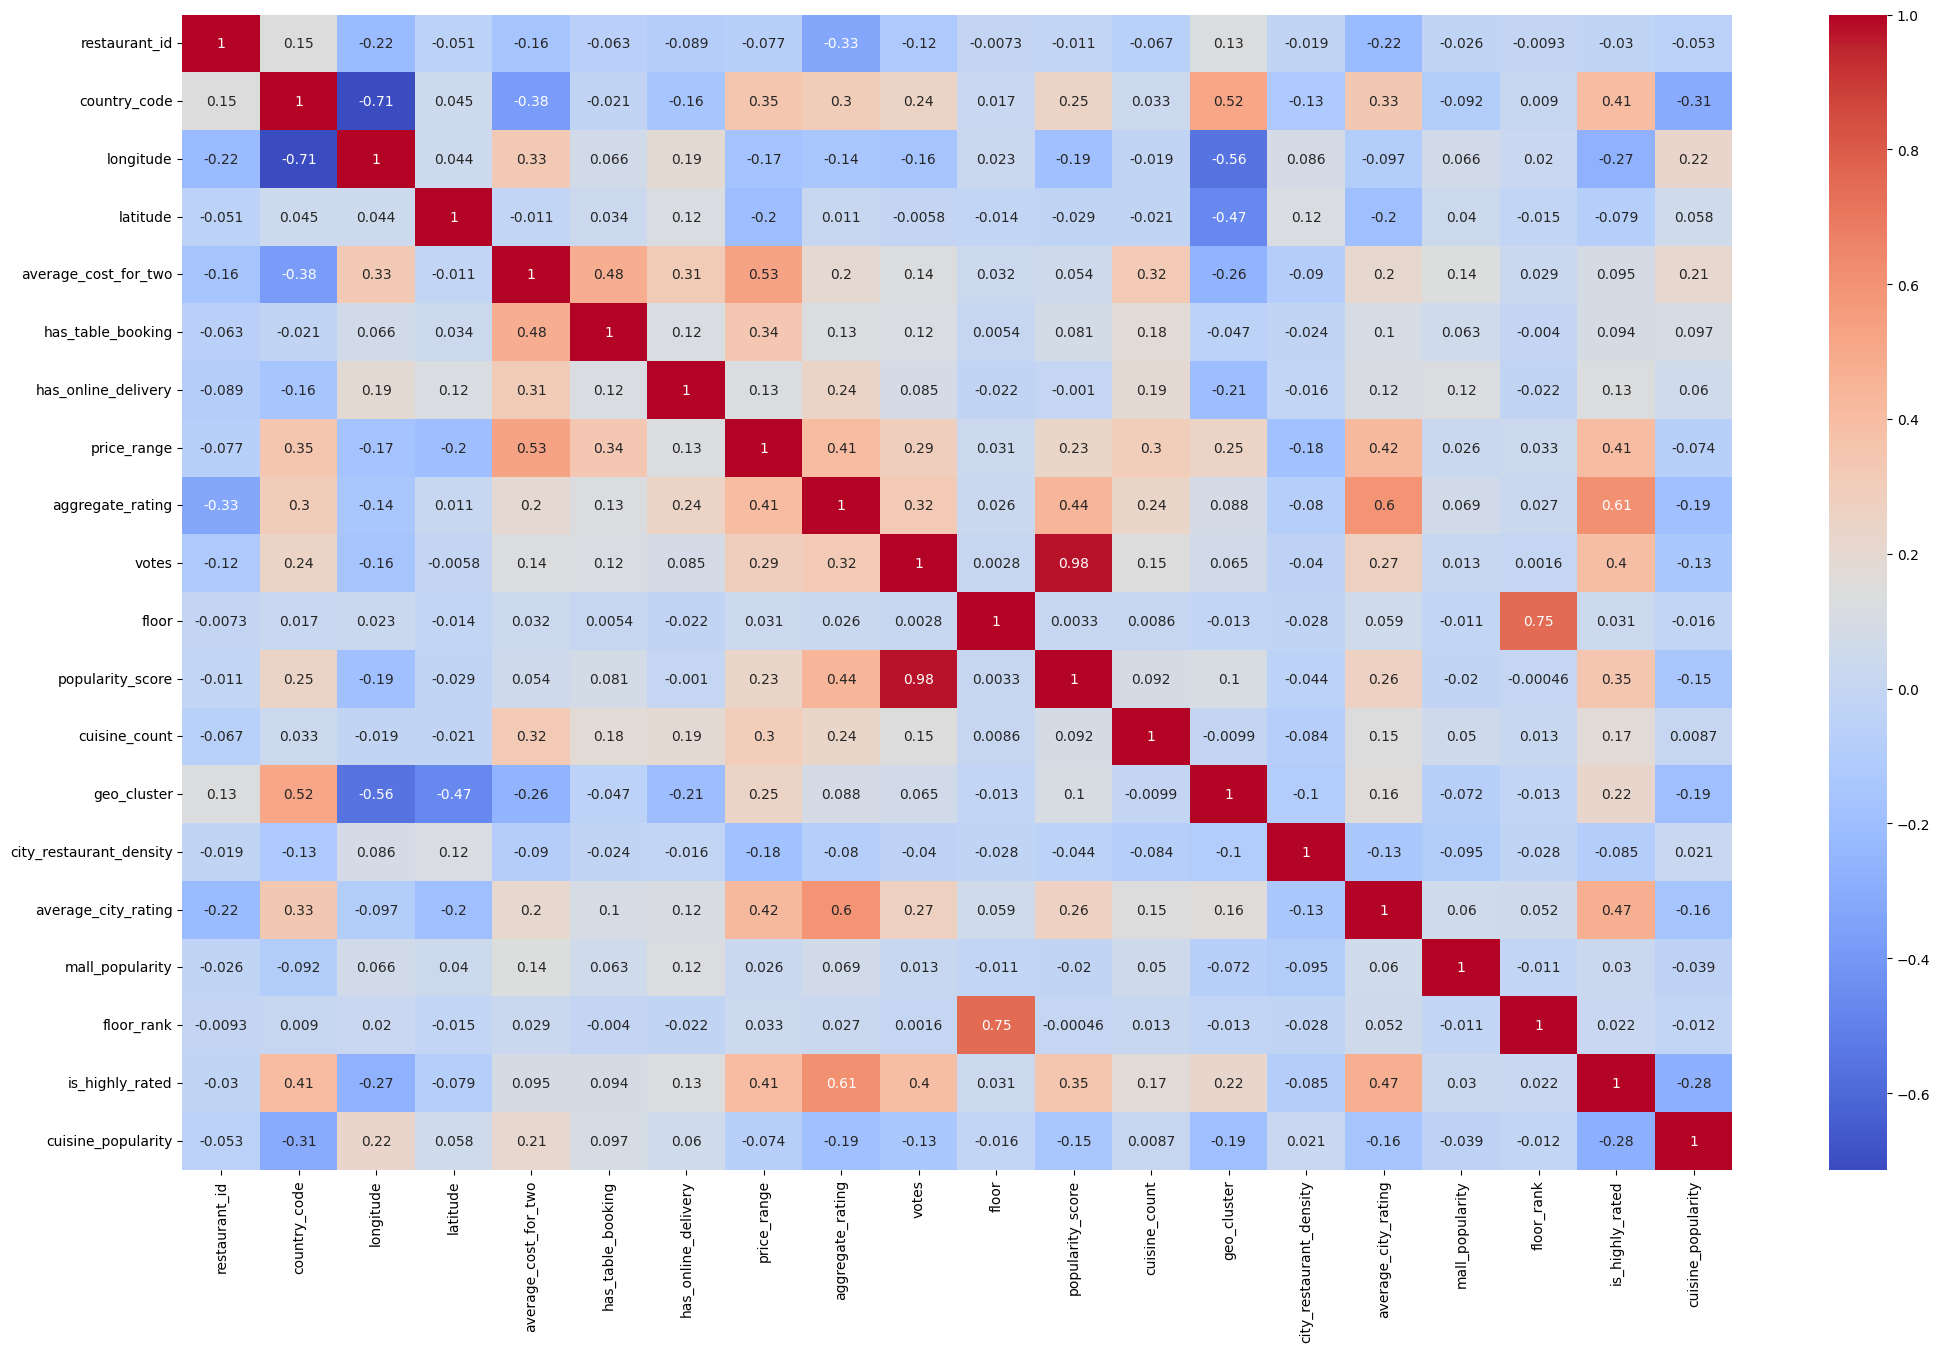

In [ ]:
# Calculate correlations with the target
correlation_matrix = df.corr(numeric_only=True)
# Check correlation among features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


In [44]:
#df.select_dtypes('object', 'category').columns
#df.info()
print(df.columns)
# Drop the columns address','restaurant_name 
df.drop(columns=['restaurant_name','restaurant_id','votes','has_online_delivery','popularity_score','average_cost_for_two','is_highly_rated','country_code','switch_to_order_menu','mall_name','street_name'], inplace=True)

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'longitude',
       'latitude', 'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'Rating Category', 'cuisine1', 'cuisine2', 'cuisine3',
       'cuisine4', 'floor', 'mall_name', 'street_name', 'popularity_score',
       'price_level', 'cuisine_count', 'geo_cluster',
       'city_restaurant_density', 'average_city_rating', 'mall_popularity',
       'floor_rank', 'is_highly_rated', 'cuisine_popularity'],
      dtype='object')


In [ ]:
df.isnull().sum()

city                       1975
longitude                     0
latitude                      0
currency                      0
has_table_booking             0
is_delivering_now             0
price_range                   0
aggregate_rating              0
rating_color                  0
rating_text                   0
Rating Category               0
cuisine1                      0
cuisine2                   3214
cuisine3                   6446
cuisine4                   8051
floor                         0
price_level                   0
cuisine_count                 0
geo_cluster                   0
city_restaurant_density    1975
average_city_rating        1975
mall_popularity              17
floor_rank                    0
cuisine_popularity            0
dtype: int64

In [46]:
# Define the target column
y = df['aggregate_rating']  # target column

# Drop 'aggregate_rating' column from the features (X)
X = df.drop(columns=['aggregate_rating'])

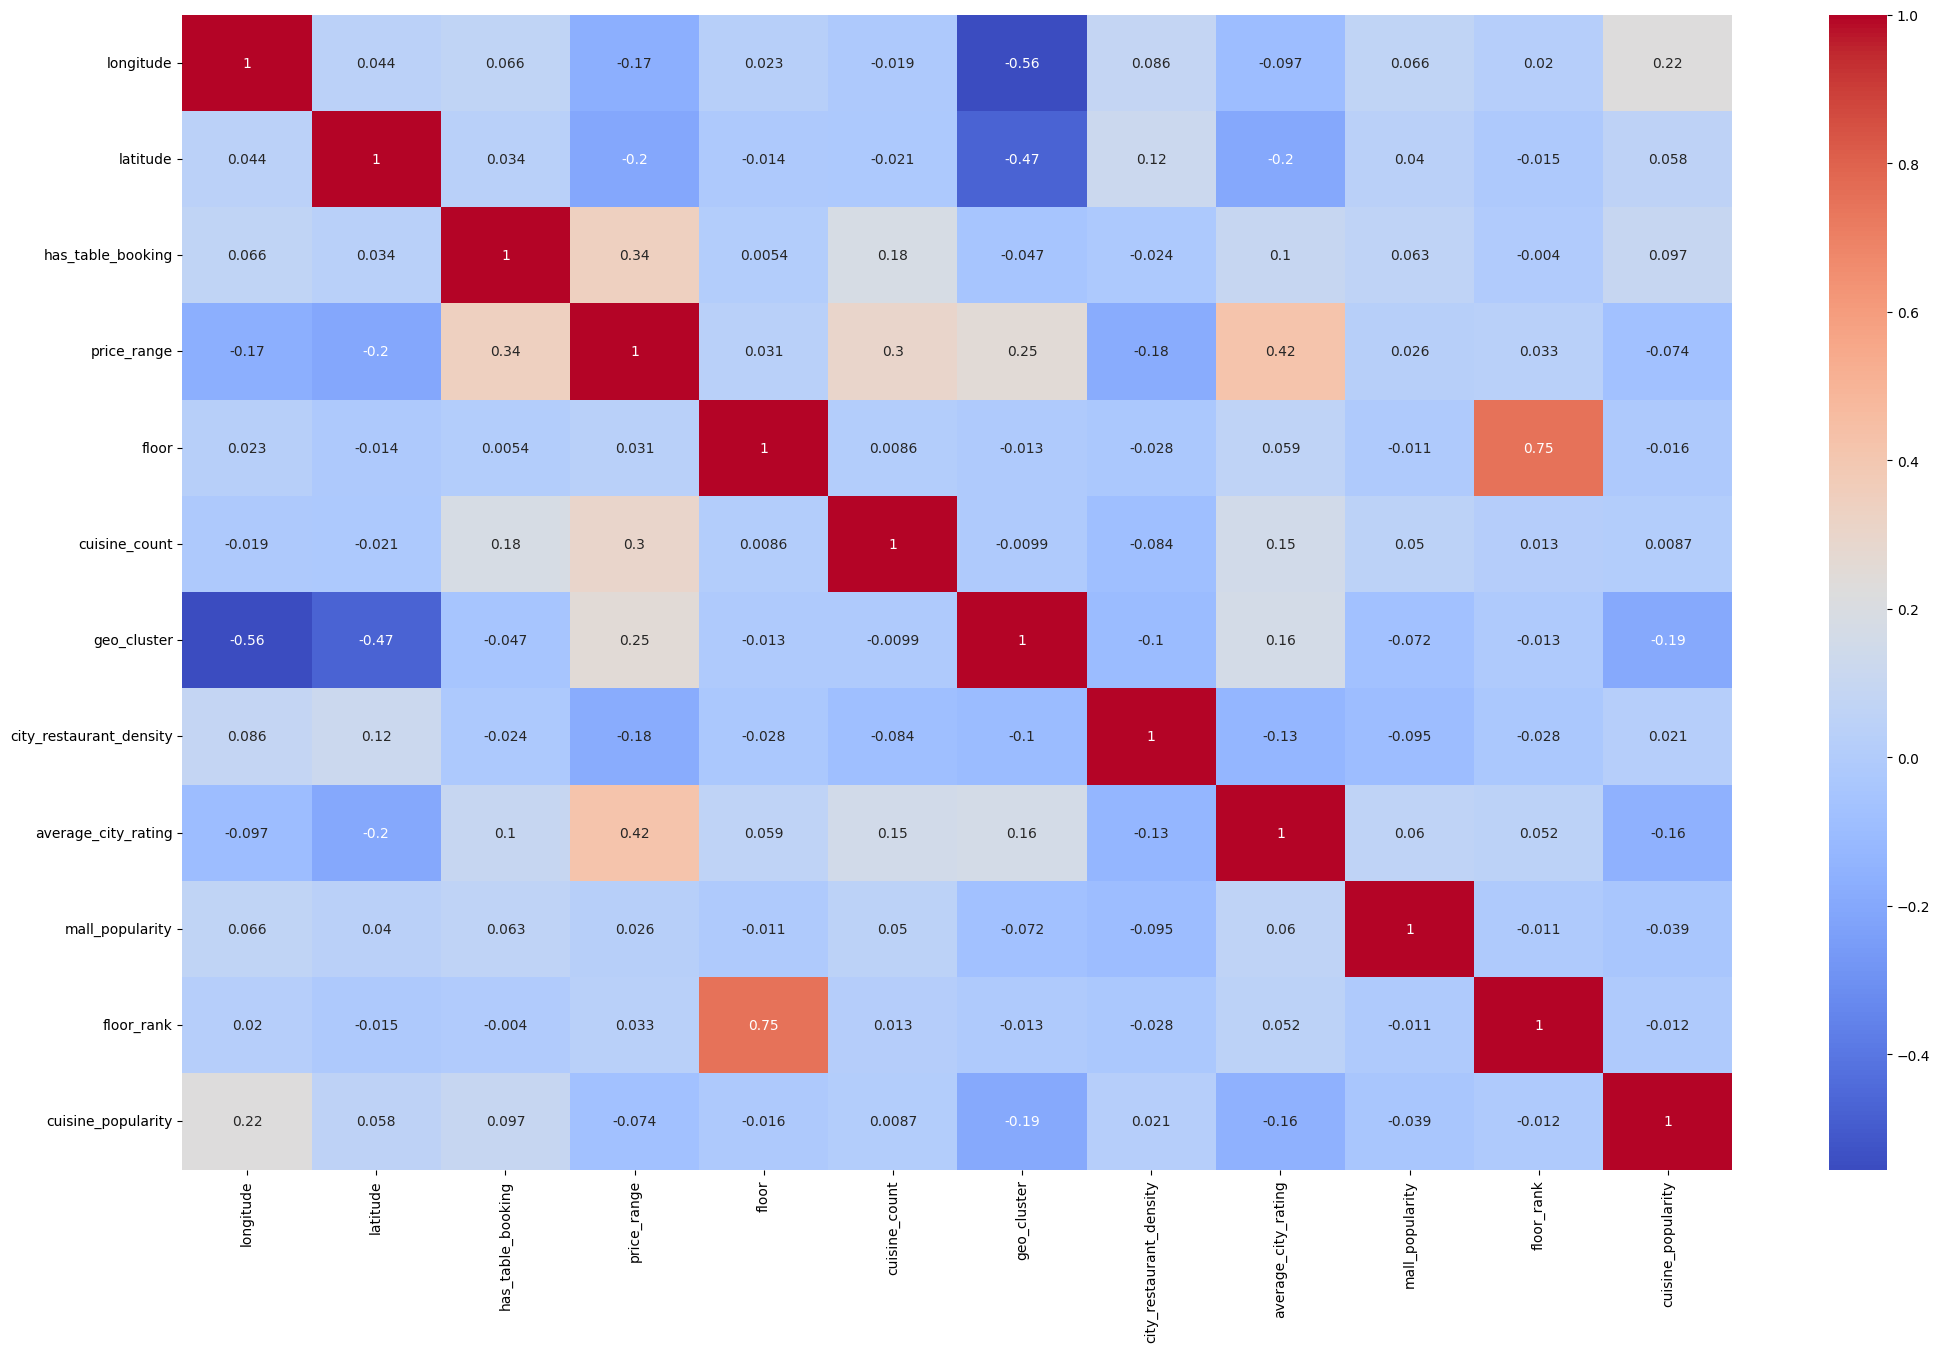

In [ ]:
## Plot heatmap for identify the corrleations between features
plt.figure(figsize=(25, 15))
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


In [48]:
X.columns

Index(['city', 'longitude', 'latitude', 'currency', 'has_table_booking',
       'is_delivering_now', 'price_range', 'rating_color', 'rating_text',
       'Rating Category', 'cuisine1', 'cuisine2', 'cuisine3', 'cuisine4',
       'floor', 'price_level', 'cuisine_count', 'geo_cluster',
       'city_restaurant_density', 'average_city_rating', 'mall_popularity',
       'floor_rank', 'cuisine_popularity'],
      dtype='object')

In [49]:
'''import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['number'])
    
    vif_df = pd.DataFrame()
    vif_df['Column'] = numeric_data.columns
    vif_df['VIF'] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    return vif_df

# Check for missing values
print(df.isnull().sum().sum())
# Call the VIF calculation function
vif_result = calculate_vif(X)
print(vif_result) '''


"import pandas as pd\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\ndef calculate_vif(data):\n    # Select only numeric columns\n    numeric_data = data.select_dtypes(include=['number'])\n    \n    vif_df = pd.DataFrame()\n    vif_df['Column'] = numeric_data.columns\n    vif_df['VIF'] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]\n    return vif_df\n\n# Check for missing values\nprint(df.isnull().sum().sum())\n# Call the VIF calculation function\nvif_result = calculate_vif(X)\nprint(vif_result) "

In [ ]:
# Print X columns name withrepect to numberes and objects
print(X.select_dtypes(include=['int64','float64']).columns)
print(X.select_dtypes(include=['object','category']).columns)


# Print the nunique  for each object column

print(X.select_dtypes(include=['object']).nunique())





Index(['longitude', 'latitude', 'has_table_booking', 'price_range', 'floor',
       'cuisine_count', 'city_restaurant_density', 'average_city_rating',
       'mall_popularity', 'floor_rank', 'cuisine_popularity'],
      dtype='object')
Index(['city', 'currency', 'is_delivering_now', 'rating_color', 'rating_text',
       'Rating Category', 'cuisine1', 'cuisine2', 'cuisine3', 'cuisine4',
       'price_level'],
      dtype='object')
city                 1251
currency               11
is_delivering_now       2
rating_color            6
rating_text             6
cuisine1              112
cuisine2              110
cuisine3               90
cuisine4               65
dtype: int64


In [51]:
df.isnull().sum()

city                       1975
longitude                     0
latitude                      0
currency                      0
has_table_booking             0
is_delivering_now             0
price_range                   0
aggregate_rating              0
rating_color                  0
rating_text                   0
Rating Category               0
cuisine1                      0
cuisine2                   3214
cuisine3                   6446
cuisine4                   8051
floor                         0
price_level                   0
cuisine_count                 0
geo_cluster                   0
city_restaurant_density    1975
average_city_rating        1975
mall_popularity              17
floor_rank                    0
cuisine_popularity            0
dtype: int64

In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import category_encoders as ce
import pandas as pd

# Assuming X is your feature set, and y is your target

# Ensure no duplicate columns in the categorical list
categorical_columns = X.select_dtypes(exclude=['float', 'int']).columns.tolist()

# Ensure only numeric columns are included in the numeric_columns list
numeric_columns = X.select_dtypes(include=['float', 'int']).columns.tolist()

# Check that only numeric columns are in numeric_columns
print("Numeric Columns: ", numeric_columns)
print("Categorical Columns:", categorical_columns)

# Define the transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numeric values with mean
    ('scaler', StandardScaler())  # Standardize numeric columns
])

# Use `OrdinalEncoder` from CategoryEncoders to handle categorical columns with unseen categories
categorical_transformer = Pipeline([
    ('encoder', ce.OrdinalEncoder(cols=categorical_columns, handle_unknown='impute'))  # Impute unknown categories
])

# Combine numeric and categorical transformers into one preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_columns),  # Apply numeric transformations
        ('categorical', categorical_transformer, categorical_columns)  # Apply ordinal encoding to categorical columns
    ]
)


# Save the preprocessor to a file
joblib.dump(preprocessor, 'preprocessor.pkl')

print("Preprocessor saved successfully!")

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Print shapes to check the transformed data
print("X_train_transformed shape:", X_train_transformed.shape)
print("X_test_transformed shape:", X_test_transformed.shape)


Numeric Columns:  ['longitude', 'latitude', 'has_table_booking', 'price_range', 'floor', 'cuisine_count', 'geo_cluster', 'city_restaurant_density', 'average_city_rating', 'mall_popularity', 'floor_rank', 'cuisine_popularity']
Categorical Columns: ['city', 'currency', 'is_delivering_now', 'rating_color', 'rating_text', 'Rating Category', 'cuisine1', 'cuisine2', 'cuisine3', 'cuisine4', 'price_level']
Preprocessor saved successfully!
X_train_transformed shape: (7812, 23)
X_test_transformed shape: (869, 23)


In [53]:
# Convert the transformed data back to a Pandas DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed)

# Check for null values
print(X_train_transformed_df.isnull().sum().sum())
print(Y_train.isnull().sum())

# check for X_test_transformed_df
X_test_transformed_df = pd.DataFrame(X_test_transformed)

print(X_test_transformed_df.isnull().sum().sum())
print(Y_test.isnull().sum())
X_test_transformed_df.fillna(0,inplace=True)
print(X_test_transformed_df.isnull().sum().sum())


0
0
98
0
0


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Ensure correct shapes
print("X_train_transformed shape:", X_train_transformed.shape)
print("Y_train shape:", Y_train.shape)

# Convert to NumPy arrays if they are pandas Series
import numpy as np

if isinstance(Y_train, pd.Series):
    Y_train = Y_train.values
if isinstance(Y_test, pd.Series):
    Y_test = Y_test.values

# Reshape Y if necessary
if len(Y_train.shape) == 1:
    Y_train = Y_train.reshape(-1, 1)
if len(Y_test.shape) == 1:
    Y_test = Y_test.reshape(-1, 1)

# Build a simple regression model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_transformed, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_transformed, Y_test, verbose=1)
print("Test Loss (MSE):", loss)
print("Test MAE:", mae)

# Generate predictions
y_pred = model.predict(X_test_transformed)  # Predict on the test data

# Flatten predictions if required
y_pred = y_pred.ravel()  # Use ravel or squeeze if you need a flat array

print("Predictions:", y_pred)


KeyboardInterrupt: 

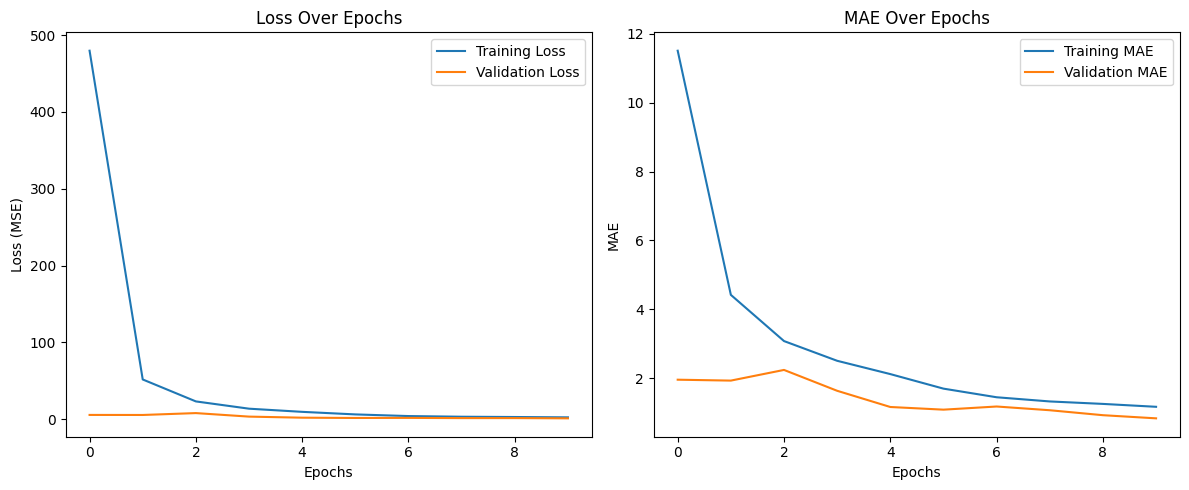

In [57]:
# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss Over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()

# Plot training and validation MAE
axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_title('MAE Over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MAE')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [58]:
# Flatten y_pred to 1D
y_pred = y_pred.ravel()  # or y_pred = y_pred.squeeze()

# Ensure Y_test is 1D (though it already seems to be from your output)
Y_test = Y_test.ravel()

# Now calculate residuals
residuals = y_pred - Y_test

## Make the residual make 1 decimal points
residuals = np.round(residuals, decimals=1)

residuals_pct = (residuals / Y_test) * 100

# Create results DataFrame
results_df = pd.DataFrame({
    'actual': Y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})

print(results_df.head(20))  # Verify the first few rows


    actual  predicted  diff   diff_pct
0      3.1   2.793775  -0.3  -9.677419
1      4.4   4.007107  -0.4  -9.090909
2      0.0   0.707303   0.7        inf
3      3.6   3.464741  -0.1  -2.777778
4      3.4   2.197708  -1.2 -35.294118
5      3.4   3.141126  -0.3  -8.823529
6      2.6   2.158781  -0.4 -15.384615
7      3.5   3.123277  -0.4 -11.428571
8      3.1   1.330757  -1.8 -58.064516
9      3.8   3.672998  -0.1  -2.631579
10     3.3   3.588723   0.3   9.090909
11     3.3   2.656011  -0.6 -18.181818
12     3.4   1.805149  -1.6 -47.058824
13     4.1   3.653751  -0.4  -9.756098
14     0.0   1.518718   1.5        inf
15     0.0   0.651061   0.7        inf
16     3.6   2.566195  -1.0 -27.777778
17     3.2   2.767446  -0.4 -12.500000
18     2.6   1.835912  -0.8 -30.769231
19     2.9   1.165952  -1.7 -58.620690


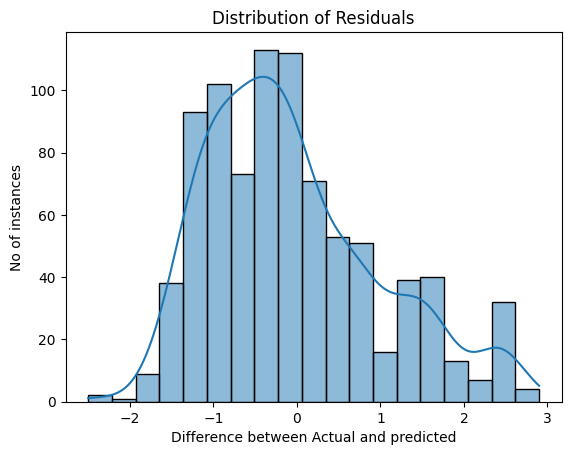

In [59]:
sns.histplot(results_df['diff'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Difference between Actual and predicted')
plt.ylabel('No of instances')
plt.show()

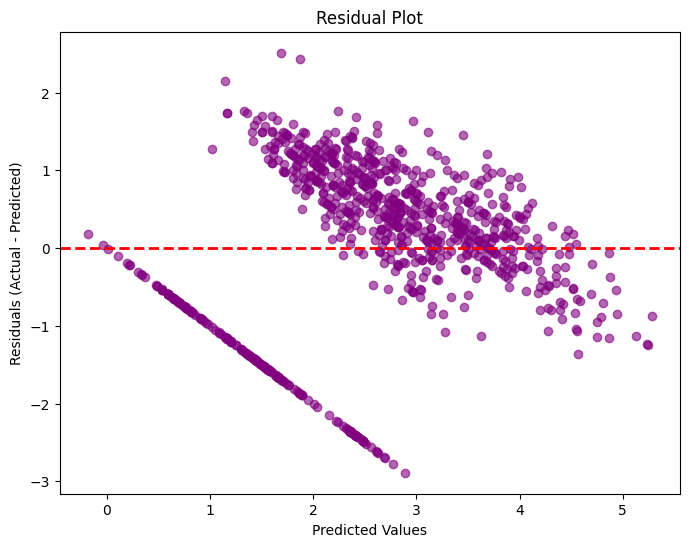

In [60]:
residuals = Y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)  # Horizontal line at 0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


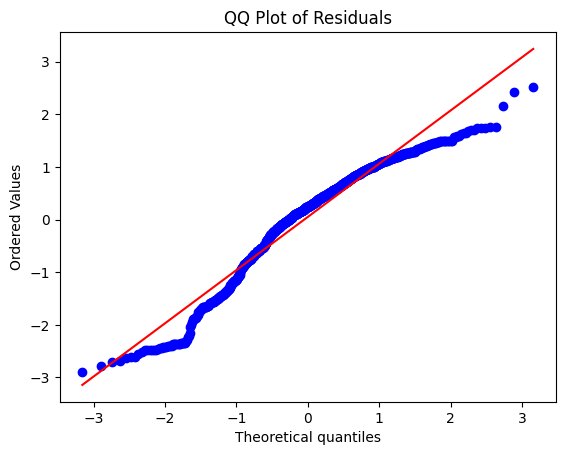

In [61]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()


In [62]:
# create the dataframe for the test data
test_df = pd.DataFrame({
    'longitude',
    'latitude', 
    'has_table_booking', 
    'price_range',
    'floor', 
    'cuisine_count', 
    'geo_cluster', 
    'city_restaurant_density', 
    'average_city_rating', 
    'mall_popularity', 
    'floor_rank', 
    'cuisine_popularity', 
    'city', 
    'currency', 
    'is_delivering_now', 
    'rating_color', 
    'rating_text', 
    'Rating Category', 
    'cuisine1', 
    'cuisine2', 
    'cuisine3', 
    'cuisine4', 
    'price_level'})